# Приоритизация гипотез и анализ А/B теста для интернет-магазина

Вместе с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Необходимо провести приоритизацию гипотез и проанализировать результаты А/В теста.

# Описание данных 

<b>Данные для приоритизации гипотез</b>: 

Файл <code>/datasets/hypothesis.csv</code> 

- <code>Hypothesis</code> — краткое описание гипотезы; 

- <code>Reach</code> — охват пользователей по 10-балльной шкале; 

- <code>Impact</code> — влияние на пользователей по 10-балльной шкале; 

- <code>Confidence</code> — уверенность в гипотезе по 10-балльной шкале; 

- <code>Efforts</code> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. 

<b>Данные для работы с A/B тестом</b>: 

Файл <code>/datasets/orders.csv</code> 

- <code>transactionId</code> — идентификатор заказа; 

- <code>visitorId</code> — идентификатор пользователя, совершившего заказ; 

- <code>date</code> — дата, когда был совершён заказ; 

- <code>revenue</code> — выручка заказа; 

- <code>group</code> — группа A/B-теста, в которую попал заказ. 

Файл <code>/datasets/visitors.csv</code>

- <code>date</code> — дата; 

- <code>group</code> — группа A/B-теста; 

- <code>visitors</code> — количество пользователей в указанную дату в указанной группе A/B-теста

## Обзор данных и подготовка их к анализу

In [1]:
#импортируем библиотеки

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

<b>Загрузим датасеты по очереди и сразу проверим данные на наличие дубликатов и пропусков</b>

<b>Датасет с гипотезами</b>

In [2]:
# Загрузка данных
pth1 = 'hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
        hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth2):
        hypothesis = pd.read_csv(pth2)
else:
        print('Something is wrong')

# Вывод первых строк DataFrame
print(hypothesis.head())

# Вывод информации о DataFrame
print(hypothesis.info())


                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 4

In [3]:
# Вывод количества дубликатов
print('Число дубликатов:', hypothesis.duplicated().sum())

# Вывод количества пропусков
print('Количество пропусков', hypothesis.isna().sum())

Число дубликатов: 0
Количество пропусков Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


<b>Датасет с заказами</b>

In [4]:
# Загрузка данных
pth1 = 'orders.csv'
pth2 = '/datasets/orders.csv'

if os.path.exists(pth1):
        orders_dt = pd.read_csv(pth1)
elif os.path.exists(pth2):
        orders_dt = pd.read_csv(pth2)
else:
        print('Something is wrong')
        
# Вывод первых строк DataFrame
print(orders_dt.head())

# Вывод информации о DataFrame
print(orders_dt.info())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


In [5]:
# Вывод количества дубликатов
print('Число дубликатов:', orders_dt.duplicated().sum())

# Вывод количества пропусков
print('Количество пропусков', orders_dt.isna().sum())

Число дубликатов: 0
Количество пропусков transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


<b>Датасет с посетителями интернет-магазина</b>

In [6]:
# Загрузка данных
pth1 = 'visitors.csv'
pth2 = '/datasets/visitors.csv'

if os.path.exists(pth1):
        visitors = pd.read_csv(pth1)
elif os.path.exists(pth2):
        visitors = pd.read_csv(pth2)
else:
        print('Something is wrong')
        
# Вывод первых строк DataFrame
print(visitors.head())

# Вывод информации о DataFrame
print(visitors.info())

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [7]:
# Вывод количества дубликатов
print('Число дубликатов:', visitors.duplicated().sum())

# Вывод количества пропусков
print('Количество пропусков', visitors.isna().sum())

Число дубликатов: 0
Количество пропусков date        0
group       0
visitors    0
dtype: int64


Определим, за какой период предоставлены данные по заказам и наблюдениям.

In [8]:
# Даты с посетителями 
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01
2019-08-31


In [9]:
# Даты с заказами 
print(orders_dt['date'].min())
print(orders_dt['date'].max())

2019-08-01
2019-08-31


### Предобработка данных

In [10]:
# Приведем имена столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower() 
orders_dt.columns = orders_dt.columns.str.lower() 

# Так же добавим нижнее подчеркивание в нужных местах 
orders_dt = orders_dt.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'})

In [11]:
# Приведем тип данных для столбцов date к временному
orders_dt['date'] = pd.to_datetime(orders_dt['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
# Проверим исправления
print(hypothesis.info())
print(orders_dt.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.

In [13]:
# Проверка наличия пользователей в обеих группах
users_in_both_groups = orders_dt.groupby('visitor_id').filter(lambda x: x['group'].nunique() > 1)

# Расчет процента пересекающихся пользователей
total_users = orders_dt['visitor_id'].nunique()
intersecting_users_count = users_in_both_groups['visitor_id'].nunique()
percentage_intersecting_users = (intersecting_users_count / total_users) * 100

print(f"Процент пересекающихся пользователей: {percentage_intersecting_users:.2f}%")

Процент пересекающихся пользователей: 5.63%


In [14]:
# Выведем таблицк отсортированную по visitor_id 

print(users_in_both_groups.sort_values(by='visitor_id'))

     transaction_id  visitor_id       date  revenue group
703      4293855558     8300375 2019-08-07     1790     A
71       3679129301     8300375 2019-08-01    10510     B
823      2971973105   199603092 2019-08-27     2790     A
246       437656952   199603092 2019-08-02     3488     B
26       2223239646   199603092 2019-08-15     3488     A
..              ...         ...        ...      ...   ...
187      2048878902  4256040402 2019-08-17     1550     A
114      1120327437  4256040402 2019-08-01     5800     A
60       1421016313  4256040402 2019-08-16    56650     B
662      1811671147  4266935830 2019-08-29    78990     A
682      1216533772  4266935830 2019-08-29    78990     B

[181 rows x 5 columns]


Процент пересечения достаточно большой, особенно учитывая исходные данные. Смотря на отсортированную таблицу мы видим что некоторые посетители попали в разные группы сделав несколько заказов и таким образом если считать по соотношению строк мы получим процент гораздо выше(15,12%). Для чистоты теста данные строки лучше исключить.

In [15]:
orders = orders_dt[~orders_dt['visitor_id'].isin(users_in_both_groups['visitor_id'])].reset_index(drop=True)

remaining_rows = orders.shape[0]

print(f"Оставшееся количество строк после исключения пересекающихся данных: {remaining_rows}")

Оставшееся количество строк после исключения пересекающихся данных: 1016


<b>Промежуточные выводы:</b>

В файлах, предоставленных для анализа, содержатся данные для приоритизации гипотез и результаты проведения A/B теста за период с 1 августа 2019 года по 31 августа 2019 года. В данных отсутствуют пропуски и дубликаты. Нарушения стиля в названиях столбцов были исправлены, а также устранены несоответствия типов данных в столбцах с датами, которые были изменены с типа object на datetime.

Так же была проведена проверка на наличие пользователей в обеих группах. Так как процент таких записей достаточно высок было принято решение исключить их данные из теста.

## Часть первая. Приоритизация гипотез

<b>Задачи данной части:</b>

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 

- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 

- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло. 

In [16]:
# Посмотрим какие гипотезы указаны в данных

pd.set_option('display.max_colwidth', None)
print(hypothesis.hypothesis)

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

### Приоритизация гипотез

#### Примение фреймворка ICE

In [17]:
# Рассчитаем показатель ICE и отсортируем по убыванию

hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis_ice = hypothesis.sort_values(by = 'ice', ascending=False)

print(hypothesis_ice)

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

<b>Промежуточный вывод:</b>

Гипотеза <code>"Запустить акцию, дающую скидку на товар в день рождения"</code> имеет наибольшее значение ICE. Компоненты ***impact*** и ***confidence*** показывают почти максимальные значения, что неудивительно, так как они показывают, насколько изменение улучшит удовлетворение пользователей и насколько мы уверены в этом. Людям нравится получать подарки, поэтому эта гипотеза выделяется. Компонент ***efforts***, отвечающий за стоимость проведения, имеет средний показатель. Например, организация рекламной рассылки или размещение привлекательного баннера на сайте, информирующего об акции, не потребует значительных затрат.

#### Примение фреймворка RICE

In [18]:
# Рассчитаем показатель RICE и отсортируем по убыванию

hypothesis['rice'] = hypothesis['reach'] * hypothesis['ice']
hypothesis_rice = hypothesis.sort_values(by = 'rice', ascending=False)

print(hypothesis_rice)

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

<b>Промежуточный вывод:</b>

При расчете RICE гипотеза <code>"Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок"</code> значительно опережает остальные по очкам.

### Выводы по гипотезам:

По фреймворку ICE наиболее приоритетными оказались следующие гипотезы:

- Запустить акцию со скидкой на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит увеличить количество пользователей на 30%.
- Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок.

По фреймворку RICE приоритетные гипотезы расположились следующим образом:

- Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит увеличить количество пользователей на 30%.

Это связано с тем, что фреймворк RICE учитывает параметр Reach (количество пользователей, которых затронет изменение), и в лидеры вышли гипотезы с наибольшим охватом пользователей.

## Часть вторая. Анализ A/B-теста


<b>Задачи данной части:</b>

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. 

- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. 

- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. 

- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения. 

- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения. 

- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. 

- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. 

- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. 

- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. 

- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения. 

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения. 

- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения. 

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

- Примите решение по результатам теста и объясните его. Варианты решений: 
  - Остановить тест, зафиксировать победу одной из групп. 
  - Остановить тест, зафиксировать отсутствие различий между группами.
  - Продолжить тест. 

<b>Подготовим данные к анализу</b>

Создадим таблицу, в которой будут собраны данные о количестве заказов, количестве покупателей, выручке и количестве посетителей, разбитые по дням и группам.

In [19]:
# Создаем массив уникальных пар значений дат и групп теста
dates_gr = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

# Получаем агрегированные кумулятивные по дням данные о заказах 
orders_agg = (dates_gr
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                                 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                    .reset_index(drop=True))
                    
# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = (dates_gr
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                      .reset_index(drop=True))

# Объединяем данные в одной таблице и присваиваем ее столбцам понятные названия
cum_d = orders_agg.merge(visitors_agg, on=['date', 'group'])
cum_d.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_d['aov'] = cum_d["revenue"] / cum_d["orders"]
cum_d['conversion'] = cum_d["orders"] / cum_d["visitors"]

cum_d_A = cum_d[cum_d['group'] == 'A'].reset_index(drop=True)
cum_d_B = cum_d[cum_d['group'] == 'B'].reset_index(drop=True)

# Проверяем полученный результат
print(cum_d.head())

        date group  orders  buyers  revenue  visitors          aov  conversion
0 2019-08-01     A      23      19   142779       719  6207.782609    0.031989
1 2019-08-01     B      17      17    59758       713  3515.176471    0.023843
2 2019-08-02     A      42      36   234381      1338  5580.500000    0.031390
3 2019-08-02     B      40      39   221801      1294  5545.025000    0.030912
4 2019-08-03     A      66      60   346854      1845  5255.363636    0.035772


### Построение графика кумулятивной выручки по группам

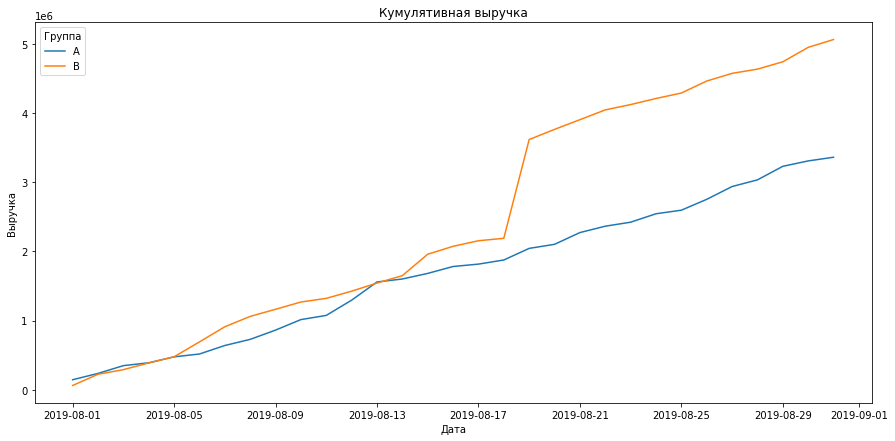

In [20]:
plt.figure(figsize=(15, 7))

for group, data in cum_d.groupby('group'):
    plt.plot(data['date'], data['revenue'], label=group)

plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(title='Группа')

plt.show()

<b>Вывод:</b>

Выручка в обеих группах увеличивается, что является положительным признаком. В группе **"B"** выручка выше практически на протяжении всего месяца. Однако в этой группе наблюдается резкий скачок с 18 на 19 число, что может указывать на всплеск числа заказов или на появление очень дорогих заказов в выборке.

### Построение графика кумулятивной среднего чека по группам

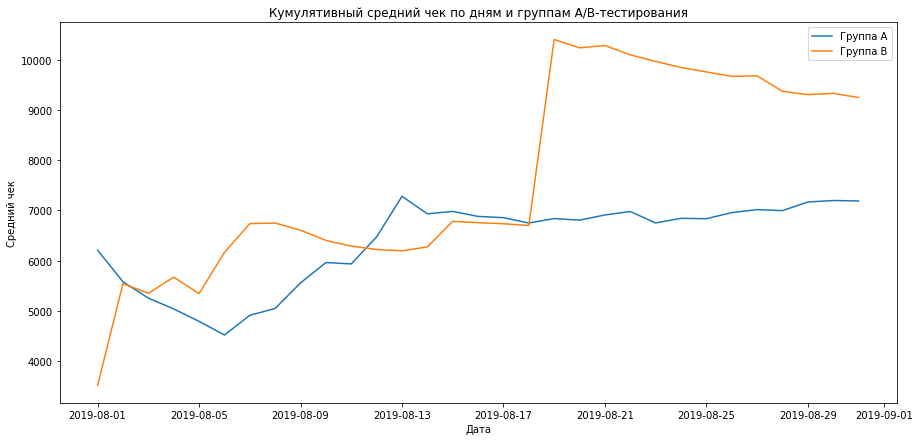

In [21]:
plt.figure(figsize=(15, 7))

plt.plot(cum_d_A['date'], cum_d_A['revenue']/cum_d_A['orders'], label='A')
plt.plot(cum_d_B['date'], cum_d_B['revenue']/cum_d_B['orders'], label='B')

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show()  

<b>Вывод:</b>

На графике можем наблюдать следующее:

- С начала месяца до 12 числа средний чек группы <i>**"В"**</i> превышает средний чек группы <i>**"А"**</i>.
- С 12 по 15 число средний чек группы <i>**"А"**</i> выше, чем у группы <i>**"В"**</i>.
- С 15 числа средний чек группы <i>**"В"**</i> постоянно выше, а 18 числа произошел резкий выброс (покупка с значительно большим чеком, чем в среднем).
- После 19 числа средний чек группы <i>**"В"**</i> плавно снижается, тогда как средний чек группы <i>**"А"**</i> плавно растет.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

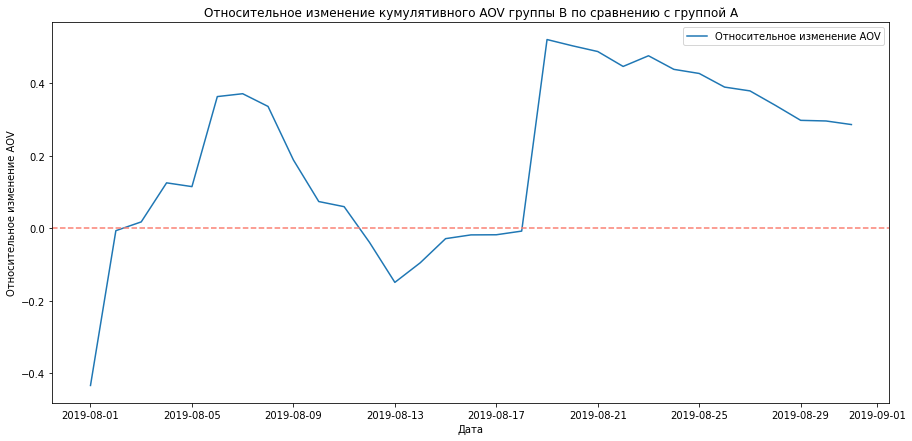

In [22]:
plt.figure(figsize=(15,7))   

relative_change_aov = (cum_d_B['aov'] / cum_d_A['aov']) - 1

plt.plot(cum_d_A['date'], relative_change_aov, label='Относительное изменение AOV')

plt.title('Относительное изменение кумулятивного AOV группы B по сравнению с группой A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение AOV')
plt.axhline(0, ls='--', color='salmon')
plt.legend()

plt.show()

<b>Вывод:</b>

График относительного изменения демонстрирует нестабильное поведение на протяжении всего периода: наблюдаются зоны роста (с 1 по 8 число, с 12 по 18 число, а также резкий скачок 18-19 числа) и зоны спада (с 9 по 13 число, а также с 20 числа до конца периода).

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

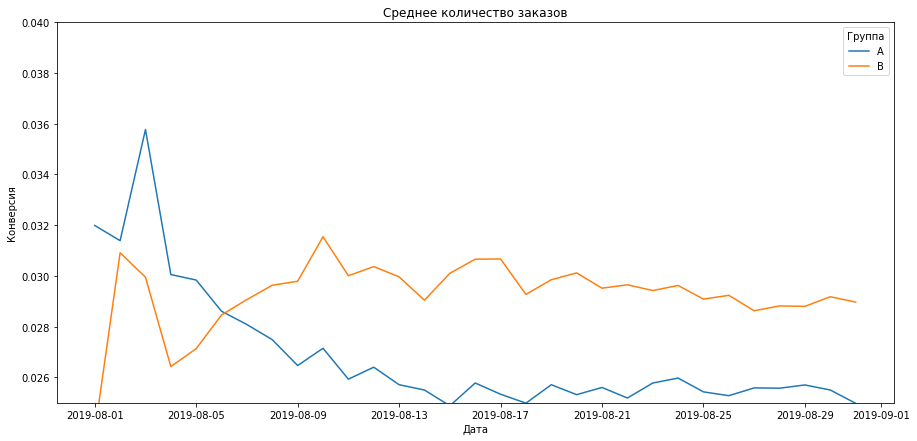

In [23]:
plt.figure(figsize=(15,7))   

for group, data in cum_d.groupby('group'):
    plt.plot(data['date'], data['conversion'], label=group)

plt.title('Среднее количество заказов')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.ylim(0.025, 0.04)
plt.legend(title='Группа')

plt.show()

<b>Вывод:</b>

График кумулятивной конверсии группы <i>**"В"**</i> на большей части периода значительно выше, чем у группы <i>**"А"**</i>. График группы <i>**"В"**</i> показывает постепенное снижение, тогда как график группы <i>**"А"**</i> демонстрирует небольшое увеличение.

### Построение графикаотносительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

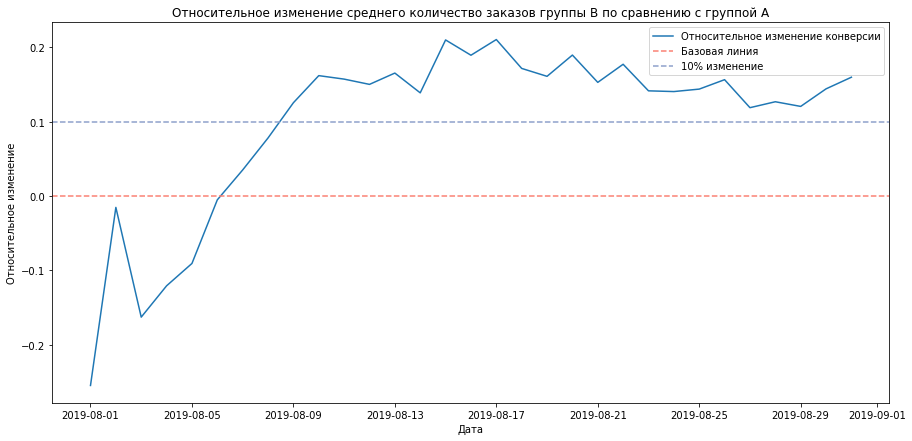

In [24]:
plt.figure(figsize=(15,7))   

relative_change_conversion = (cum_d_B['conversion'] / cum_d_A['conversion']) - 1

plt.plot(cum_d_A['date'], relative_change_conversion, label='Относительное изменение конверсии')

plt.title('Относительное изменение среднего количество заказов группы B по сравнению с группой A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

plt.axhline(0, ls='--', color='salmon', label='Базовая линия')
plt.axhline(0.1, ls='--', color='#8da0cb', label='10% изменение')
plt.legend()

plt.show()

<b>Вывод:</b>

Несмотря на то что график изменения конверсии группы <i>**"В"**</i> на большей части рассматриваемого периода показывает лучшие результаты. Отношение конверсии еще не стабилизировалось, и пока рано делать какие-либо выводы по тесту. Сначала необходимо проанализировать аномалии, так как они могут изменить общую картину.

### Построение точечного графика количества заказов по пользователям

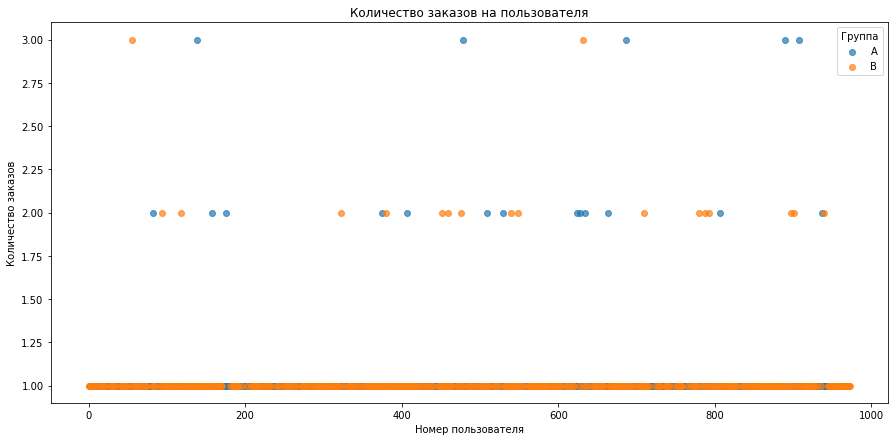

In [25]:
plt.figure(figsize=(15,7))   

orders_u = orders.groupby(['visitor_id', 'group'], as_index=False).agg({'transaction_id': 'nunique'})
orders_u.columns = ['visitor_id', 'group', 'orders']

x_values = pd.Series(range(0, len(orders_u)))

for group, data in orders_u.groupby('group'):
    plt.scatter(x_values[orders_u['group'] == group], data['orders'], label=group, alpha=0.7)

plt.title('Количество заказов на пользователя')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')

plt.legend(title='Группа')

plt.show()

<b>Вывод:</b>

На графике видно, что пользователи в обеих группах в основном делали по одному заказу. Гораздо реже встречаются случаи с двумя заказами и крайне редко с тремя.

#### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей. 

In [26]:
orders_u_A = orders_u[orders_u['group'] == 'A']
orders_u_B = orders_u[orders_u['group'] == 'B']

# Вычисление 95-го и 99-го перцентилей для группы A
percentiles_A = np.percentile(orders_u_A['orders'], [95, 99])

# Вычисление 95-го и 99-го перцентилей для группы B
percentiles_B = np.percentile(orders_u_B['orders'], [95, 99])

# Вывод результатов
print('95-й и 99-й перцентили группы А:', percentiles_A)
print('95-й и 99-й перцентили группы B:', percentiles_B)

95-й и 99-й перцентили группы А: [1.   2.56]
95-й и 99-й перцентили группы B: [1. 2.]


<b>Вывод:</b>

В группе <i>**"A"**</i> не более 1% клиентов оформили более двух заказов. В группе <i>**"В"**</i> ситуация аналогична: не более 1% клиентов оформили более двух заказов.

### Построение точечного графика стоимостей заказов

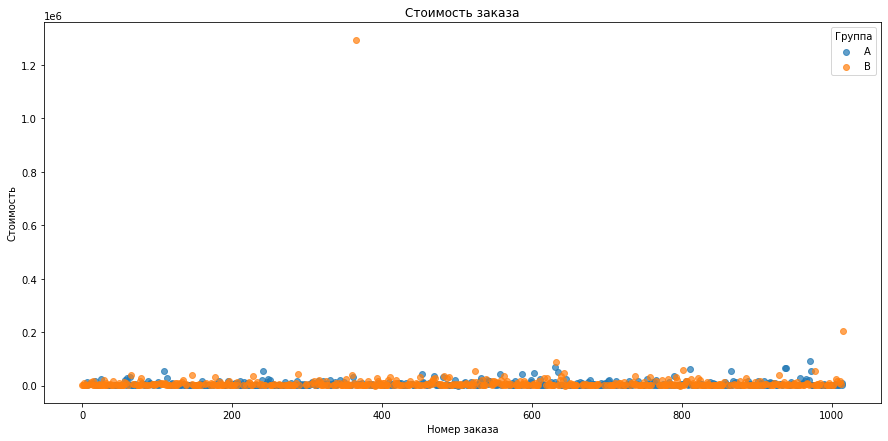

In [27]:
# Построим общий график

plt.figure(figsize=(15,7))   

x_values = pd.Series(range(0, len(orders['revenue'])))

for group, data in orders.groupby('group'):
    plt.scatter(x_values[orders['group'] == group], data['revenue'], label=group, alpha=0.7)

plt.title('Стоимость заказа')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость')
plt.legend(title='Группа')

plt.show()

Видно что у группы <i>**"В"**</i> есть заказ с очень высокой стоимостью. Из-за этого на данном графике теряется группа <i>**"A"**</i>, построим для нее отдельный график.

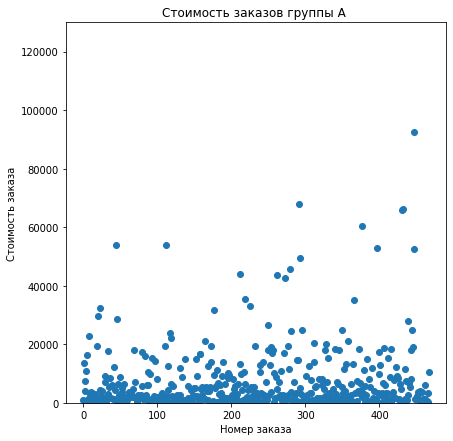

In [28]:
plt.figure(figsize=(15, 7))

revenue_orders_A = orders.query('group == "A"')['revenue']
revenue_orders_B = orders.query('group == "B"')['revenue']

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(revenue_orders_A)))
plt.scatter(x_values, revenue_orders_A ) 
plt.title("Стоимость заказов группы А ")
plt.xlabel("Номер заказа")
plt.ylabel("Стоимость заказа")
plt.ylim(0,130000)

plt.show()

<b>Вывод:</b>

У большинства пользователей в обеих группах сумма заказа не превышает 20 тысяч рублей. Встречаются единичные случаи с суммой в 100 тысяч рублей и более. Однако в графике группы <i>**"В"**</i> виден единичный заказ на сумму более 1,2 миллиона. Этот заказ является причиной резкого скачка кумулятивного среднего чека.

#### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей. 

In [29]:
percentiles_A = np.percentile(revenue_orders_A, [95, 99])
percentiles_B = np.percentile(revenue_orders_B, [95, 99])

print('95-й и 99-й перцентили группы А:', percentiles_A)
print('95-й и 99-й перцентили группы B:', percentiles_B)

95-й и 99-й перцентили группы А: [24944.5  56064.18]
95-й и 99-й перцентили группы B: [27561.5 49553.6]


<b>Вывод:</b>

В группе <i>**"А"**</i> не более 5% заказов превышают 24 944,5 рублей, и лишь 1% — 56 06,18 рубля. В группе <i>**"В"**</i> не более 5% заказов превышают 27 561,5 рублей, и лишь 1% — 49 553,6 рублей. В дальнейшем будем считать аномальными заказы, превышающие 30,000 рублей.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы:

- Н0 - Cтатистически значимых различий в среднем количестве заказов между группами нет
 
- Н1 - Cтатистически значимых различий в среднем количестве заказов между группами есть

Пороговое значение *alpha* примем за 5%.

In [30]:
# Необходимы переменные, с пользователями из разных групп с количество заказов
orders_A = pd.concat([orders_u_A['orders'],
                     pd.Series(0, index=np.arange(cum_d_A['visitors'].sum() - len(orders_u_A['orders'])),
                               name='orders')],axis=0)

orders_B = pd.concat([orders_u_B['orders'],
                     pd.Series(0, index=np.arange(cum_d_B['visitors'].sum() - len(orders_u_B['orders'])),
                               name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(orders_A, orders_B)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}".format(orders_B.mean()/orders_A.mean()-1))

p-значение: 0.010
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".
Относительный прирост конверсии группы B: 0.166


<b>Вывод:</b>

После очистки данных значение *p-value* составило 0.010, что подтверждает статистическую значимость, как и в случае с исходными данными. В таком случае нулевая гипотеза отвергается. Относительная разница в сумме среднего чека между группами составила 16.6% — средний чек группы <i>**"В"**</i> превышает средний чек группы <i>**"А"**</i> на эту величину.

Гипотеза о равенстве сумм среднего чека в обеих группах после очистки данных с большой вероятностью не подтверждается.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

- Н0 - Cтатистически значимых различий в среднем чеке между группами нет
 
- Н1 - Cтатистически значимых различий в среднем чеке между группами есть

Пороговое значение *alpha* примем за 5%.

In [31]:
orders_r_A = orders.query('group == "A"').reset_index(drop=True)
orders_r_B = orders.query('group == "B"').reset_index(drop=True)

results = stats.mannwhitneyu(orders_r_A['revenue'], orders_r_B['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(orders_r_B['revenue'].mean()/orders_r_A['revenue'].mean()-1))

p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: 0.287


<b>Вывод:</b>

По "сырым" данным значение *p-value* = 0.829, что значительно превышает уровень статистической значимости. Таким образом, гипотеза о том, что различий в сумме среднего чека между группами нет, не отвергается. Наблюдаемое различие в сумме среднего чека между группами в 28.7% — не является статистически значимым, т.к. на графике стоимости заказов у группы <i>**"В"**</i> наблюдался единичный заказ сильно превышающий по сумме основную массу заказов в обеих группах.

Гипотеза о равенстве сумм среднего чека в обеих группах по "сырым" данным с большой вероятностью не отвергается.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [32]:
users_m = orders_u[orders_u['orders'] > 4]['visitor_id']
users_e = orders[orders['revenue'] > 58234]['visitor_id']
ab_normal_u = (pd.concat([users_m, users_e], axis = 0)
                 .drop_duplicates()
                 .reset_index(drop=True))
orders_A_f = pd.concat(
    [orders_u_A[np.logical_not(orders_u_A['visitor_id'].isin(ab_normal_u))]['orders'],
     pd.Series(0, index=np.arange(cum_d_A['visitors'].sum() - len(orders_u_A['orders'])),
               name='orders')],axis=0)

orders_B_f = pd.concat(
    [orders_u_B[np.logical_not(orders_u_B['visitor_id'].isin(ab_normal_u))]['orders'],
     pd.Series(0, index=np.arange(cum_d_B['visitors'].sum() - len(orders_u_B['orders'])),
               name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(orders_A_f, orders_B_f)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}"
      .format(orders_B_f.mean()/orders_A_f.mean() - 1))

p-значение: 0.008
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".
Относительный прирост конверсии группы B: 0.170


<b>Вывод:</b>

Статистическая значимость подтверждена, как и в случае с исходными данными. Относительный прирост количества заказов группы <i>**"В"**</i> по сравнению с группой <i>**"А"**</i> по «очищенным» данным составляет 17%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
results = stats.mannwhitneyu(orders_r_A[np.logical_not(orders_r_A['visitor_id'].isin(ab_normal_u))]['revenue'],
                             orders_r_B[np.logical_not(orders_r_B['visitor_id'].isin(ab_normal_u))]['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(orders_r_B[np.logical_not(orders_r_B['visitor_id'].isin(ab_normal_u))]['revenue'].mean()
              / orders_r_A[np.logical_not(orders_r_A['visitor_id'].isin(ab_normal_u))]['revenue'].mean() - 1))

p-значение: 0.901
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: -0.032


<b>Вывод:</b>

Как и в случае с "сырыми" данными значение p-value равное 0.901 значительно превышает уровень статистической значимости. Однако разница между сегментами сократилась с 29% до почти нулевой, и средний чек в группе <i>**"В"**</i> стал даже немного ниже, чем в группе <i>**"А"**</i>. Таким образом подверждается мысль что такой большой процент разницы среднего чека в группе <i>**"В"**</i>, при анализе "сырых" данных, был из-за аномального заказа с высокой стоимостью.

### Принятие решения по результатам теста

На основании анализа результатов A/B-тестирования можно сделать следующие выводы:

- Статистически значимое различие по конверсии между группами наблюдается как по сырым данным, так и после удаления аномалий.
- По сырым и очищенным данным нет статистически значимого различия в среднем чеке между группами.
- График различия конверсии показывает, что результаты группы <i>**"В"**</i> лучше, чем у группы <i>**"А"**</i>, с тенденцией к росту или стабилизации около среднего значения.
- График различия среднего чека колеблется, но к концу периода наблюдения результаты группы B становятся лучше, чем у группы A. Однако, после удаления аномальных пользователей, средний чек группы <i>**"В"**</i> практически не изменился и даже стал немного ниже по сравнению с группой <i>**"А"**</i>.

На основании этих данных, **тест следует остановить, зафиксировать победу группы В и перейти к проверке следующей гипотезы**.

# Общий вывод по проекту:

Проект был направлен на повышение выручки интернет-магазина посредством двух ключевых задач: 
- приоритизации гипотез, способных увеличить продажи
- проведения A/B-тестирования для проверки эффективности наиболее перспективных из них.

Перед началом анализа данных была проведена тщательная проверка информации, и выяснилось, что данные за август 2019 года полностью соответствуют требованиям: отсутствуют пропущенные значения и дубликаты. Также были устранены форматы данных, например, столбцы с датами были преобразованы из текстового в формат datetime, и исправлены стилистические ошибки в названиях столбцов для упрощения работы с данными.

Первая фаза проекта включала анализ девяти гипотез для увеличения продаж с использованием фреймворков ICE и RICE. ICE оценил потенциальное влияние, уверенность в успехе и затраты на внедрение каждой гипотезы. Наиболее перспективной по этой модели оказалась гипотеза <code>"Запустить акцию, дающую скидку на товар в день рождения"</code>, получившая высокие оценки по влиянию и уверенности.

Использование только фреймворка ICE не дает полной картины, поэтому был применен RICE, который учитывает охват (reach) – количество пользователей, затронутых изменением. Это критически важно для оценки масштабируемости гипотезы и ее влияния на выручку. Анализ с помощью RICE показал, что наиболее перспективной является гипотеза <code>"Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок"</code>. Высокий охват в 10, значительно превышающий показатели других гипотез, делает эту гипотезу приоритетной для дальнейшего тестирования.

Вторая фаза проекта заключалась в A/B-тестировании гипотезы. Результаты показали, что кумулятивная выручка группы В (с внедрением изменения) стабильно превышала показатели группы А (контрольной) на протяжении всего тестового периода, с особенно значительным скачком 19 августа 2019 года. Анализ кумулятивного среднего чека показал большую нестабильность в группе В, хотя она также демонстрировала тенденцию к превышению группы А. Кумулятивная конверсия группы В стабильно превосходила конверсию группы А, хоть и не так существенно. В целом, A/B-тестирование подтвердило эффективность гипотезы <code>"Добавить форму подписки на все основные страницы для сбора базы клиентов для email-рассылок"</code>, позволяя рекомендовать ее внедрение для роста выручки и расширения клиентской базы.